<a href="https://colab.research.google.com/github/AshKatzEm/esrb_ratings_analysis_project/blob/main/ESRB_Project_Modeling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# load relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
sns.set()

# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

In [20]:
df = pd.read_csv("/content/drive/MyDrive/esrb_ratings_analysis_project/data/Cleaned_complete_dataset.csv")
df

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate,strong_language,num_descriptors
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2021-03-02,0,1
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,ET,2021-05-14,0,3
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,M,NaN,1,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ET,2015-03-17,0,3
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,T,2021-03-02,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,For Honor,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,M,2017-02-14,0,2
2321,Victor Vran Overkill Edition,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,M,NaN,0,2
2322,Danganronpa 1•2 Reload,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,M,NaN,1,4
2323,Touhou Double Focus,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,T,2017-03-21,0,3


In [22]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}
df["esrb_encoded"] = df["esrb_rating"].map(encode)

There is a specific word for data that is categorical but has a hierarchy to it

In [23]:
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate,strong_language,num_descriptors,esrb_encoded
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,E,2021-03-02,0,1,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,ET,2021-05-14,0,3,1
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,M,NaN,1,3,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,ET,2015-03-17,0,3,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,T,2021-03-02,0,3,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2325 non-null   object
 1   alcohol_reference         2325 non-null   int64 
 2   animated_blood            2325 non-null   int64 
 3   blood                     2325 non-null   int64 
 4   blood_and_gore            2325 non-null   int64 
 5   cartoon_violence          2325 non-null   int64 
 6   crude_humor               2325 non-null   int64 
 7   drug_reference            2325 non-null   int64 
 8   fantasy_violence          2325 non-null   int64 
 9   intense_violence          2325 non-null   int64 
 10  language                  2325 non-null   int64 
 11  lyrics                    2325 non-null   int64 
 12  mature_humor              2325 non-null   int64 
 13  mild_blood                2325 non-null   int64 
 14  mild_cartoon_violence   

In [25]:
#df["esrb_encoded"] = df.esrb_rating.astype(float)

df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

# the second method worked but not the first

In [26]:
df.columns


Index(['title', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_sexual_content', 'suggestive_themes',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence', 'esrb_rating',
       'ReleaseDate', 'strong_language', 'num_descriptors', 'esrb_encoded'],
      dtype='object')

Needed to change the encoded type to a number so we can get correlations

<Axes: >

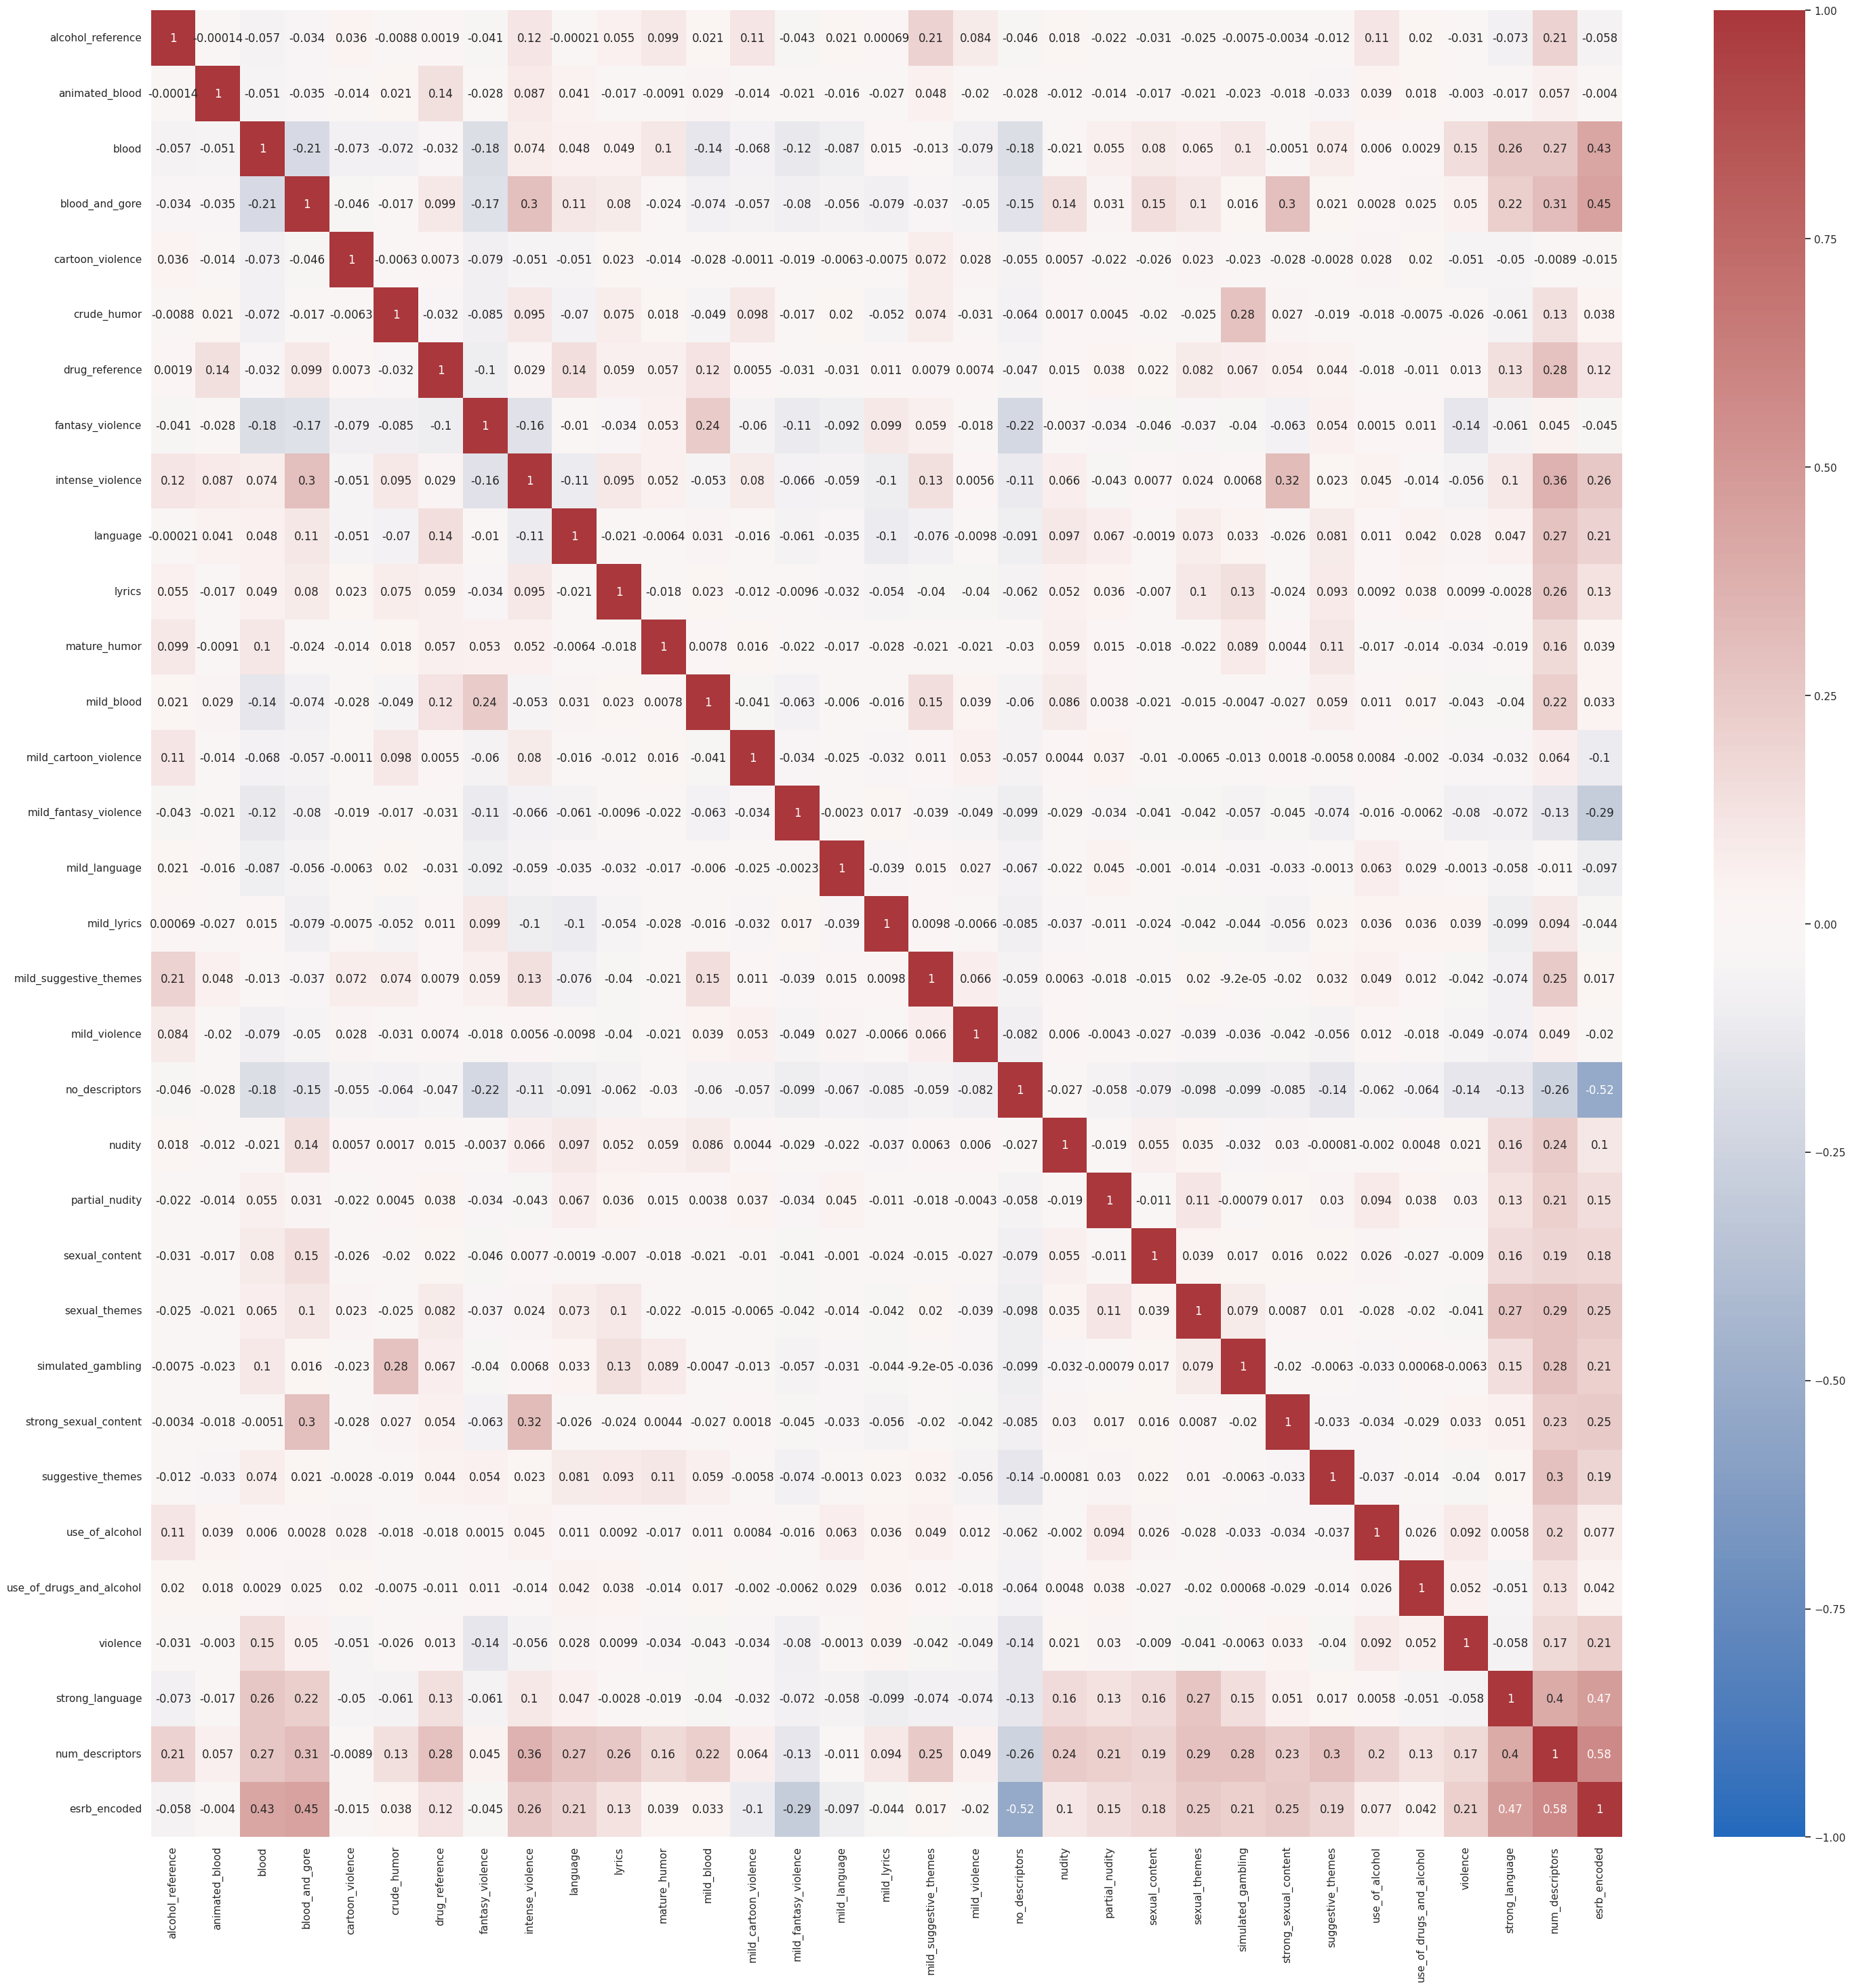

In [37]:
numeric = df.copy()
numeric.drop(columns=["title","esrb_rating", "ReleaseDate"], inplace=True)

plt.figure(figsize=(35, 35))

sns.heatmap(numeric.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

Might want to remove no_descriptors from the column names

In [204]:
df.drop(columns=["ReleaseYear"], inplace=True)

In [209]:
selected_features = list(df.columns)

Using just the

In [205]:
df["ReleaseDate"] = df['ReleaseDate'].str.replace("-", "")
df['ReleaseDate']

0       20210302
1       20210514
2            NaN
3       20150317
4       20210302
          ...   
2320    20170214
2321         NaN
2322         NaN
2323    20170321
2324    20180227
Name: ReleaseDate, Length: 2325, dtype: object

Lets try using the Release date in three ways:
<br>
1)imputed missings as 0
<br>
2)dropped missing
<br>
3)no release date

In [206]:
dfi=df.copy()
dfi.fillna(0, inplace=True)
dfi["ReleaseDate"]=dfi["ReleaseDate"].astype(int)

dfd =df.copy()
dfd.dropna(inplace=True)
dfd['ReleaseDate'] = dfd['ReleaseDate'].astype(int)

dfo=df.copy()
dfo["ReleaseDate"]=0
dfo["ReleaseDate"]

0       0
1       0
2       0
3       0
4       0
       ..
2320    0
2321    0
2322    0
2323    0
2324    0
Name: ReleaseDate, Length: 2325, dtype: int64

In [210]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_encoded")
selected_features.remove("no_descriptors")



# cosole can also probably be removed

In [211]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'ReleaseDate',
 'strong_language',
 'num_descriptors']

In [212]:

X = dfo[selected_features]

y = dfo["esrb_rating"]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Going to split the current dataset for now instead of using the test data

In [130]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1860 
Length of our Testing data: 465


First will try a normal decision tree and then a random forest

These seem like the best classifiers to use

In [131]:
model = DecisionTreeClassifier()

In [132]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [133]:
y_pred = model.predict(X_test)

In [134]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

#precision = precision_score(y_true=y_test, y_pred=y_pred)
#print("Precision Score: %f" % precision)

#recall = recall_score(y_true=y_test, y_pred=y_pred)
#print("Recall Score: %f" % recall)

#f1 = f1_score(y_true=y_test, y_pred=y_pred)
#print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
#auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
#print('AUC Score: %f' % auc)

Accuracy Score: 0.772043


Need different metrics for a multiclass classifier

In [135]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.85      0.96      0.90       112
          ET       0.87      0.44      0.58        91
           M       0.81      0.76      0.79        87
           T       0.69      0.83      0.75       175

    accuracy                           0.77       465
   macro avg       0.81      0.75      0.76       465
weighted avg       0.79      0.77      0.76       465



In [136]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[108   0   0   4]
 [  4  40   1  46]
 [  5   0  66  16]
 [ 10   6  14 145]]


Lets try with imputed NaN dates

In [138]:
X = dfi[selected_features]

y = dfi["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Lenght of our Training data: 1860 
Length of our Testing data: 465
              precision    recall  f1-score   support

           E       0.93      0.95      0.94       112
          ET       0.68      0.66      0.67        91
           M       0.82      0.83      0.82        87
           T       0.78      0.78      0.78       175

    accuracy                           0.80       465
   macro avg       0.80      0.80      0.80       465
weighted avg       0.80      0.80      0.80       465



Lets try with imputed dated

In [144]:
X = dfd[selected_features]

y = dfd["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Lenght of our Training data: 1474 
Length of our Testing data: 369
              precision    recall  f1-score   support

           E       0.93      0.98      0.95        84
          ET       0.80      0.79      0.79        80
           M       0.81      0.87      0.84        77
           T       0.80      0.74      0.77       128

    accuracy                           0.83       369
   macro avg       0.83      0.84      0.84       369
weighted avg       0.83      0.83      0.83       369



That looks the best right now

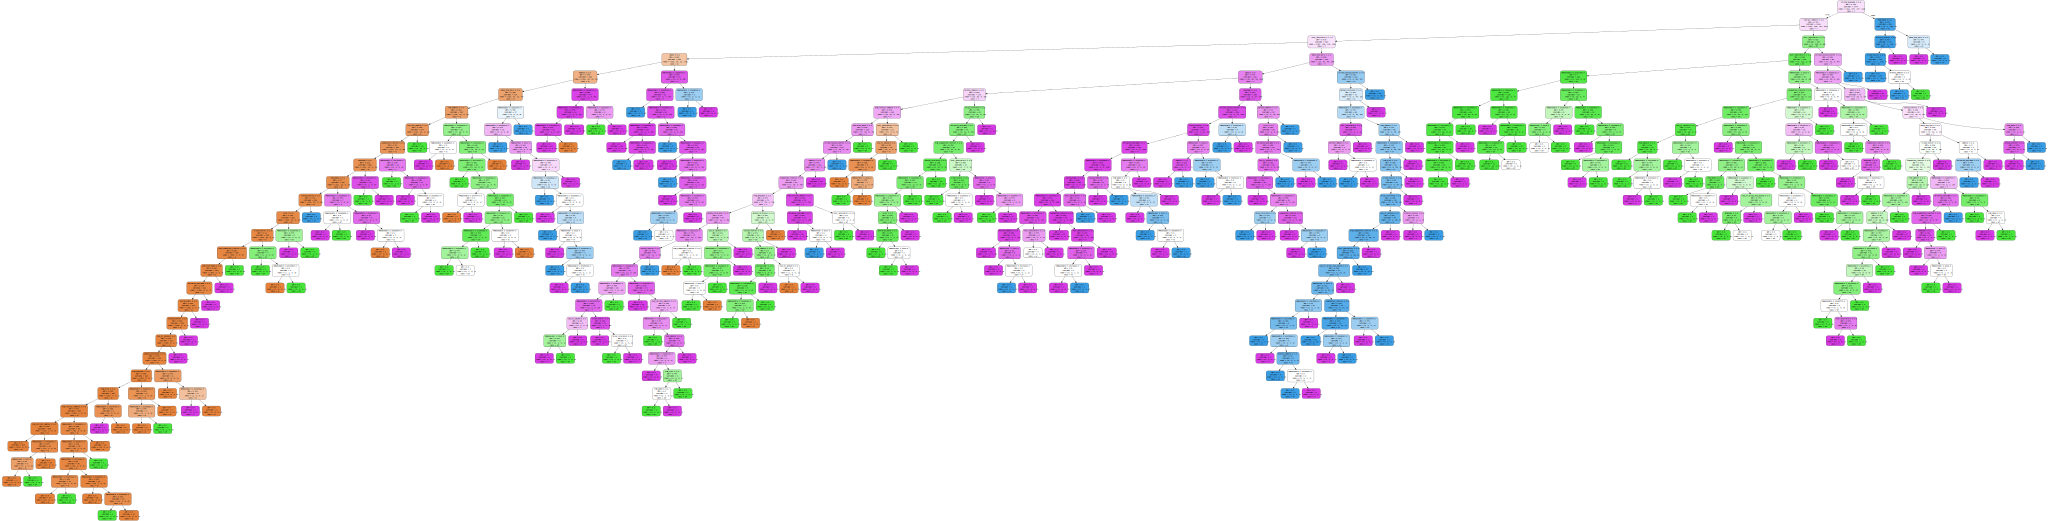

In [140]:
dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

graph

Strong Language is the first split

Could try tuning the parameters

In [141]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
31,0.157970,num_descriptors
29,0.151132,ReleaseDate
30,0.130425,strong_language
7,0.119362,fantasy_violence
2,0.077129,blood
3,0.061650,blood_and_gore
28,0.053224,violence
25,0.023561,suggestive_themes
18,0.022299,mild_violence
9,0.018195,language


Release date seems important and it's a continuous feature so that might be a meaningful importance

Now I will do some hyper paramtere tuning

In [ ]:
# params = {
#     "criterion": ["gini", "entropy"],
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [32, 35, 38],
#     "max_depth": [ 52, 55, 58, None],
#     #"min_samples_leaf" : [1, 5, 100], # removed this as 1 which is the default always seems to be the nest
#     "splitter" : ["best", "random"]
#     }

In [ ]:
# grid_search_cv =  GridSearchCV( estimator=DecisionTreeClassifier(),
#     param_grid=params,
#     scoring= "f1_weighted" )

# # need to change the average as multclass is not supported

# # to change the average we need to use none, micro, macro or weighted

In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)

# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
#                               X=X_test,
#                               y_true=y_test,
#                               ax=ax,
#                               cmap="Blues")

# # ConfusionMatrixDisplay.from_estimator will be deprecated so should change the plotting method used

I think the order of the classes should reflect the progression of the ratings

M should be the last class

In [ ]:
# dot_data = tree.export_graphviz(model, out_file=None,
#                      feature_names=selected_features,
#                      class_names=["E", "ET", "M", "T"],
#                      filled=True, rounded=True,
#                      special_characters=True)
# graph = graphviz.Source(dot_data)

# graph

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Hyper Paramteter tuning did not help the models

They are still only about 85% accurate
<br>
Lets try having three trains and tests to speed up trying the different releasedate methods with different models

In [213]:
Xd = dfd[selected_features]
yd = dfd["esrb_rating"]
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=45)

Xi = dfi[selected_features]
yi = dfi["esrb_rating"]
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=45)

Xo = dfo[selected_features]
yo = dfo["esrb_rating"]
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.2, random_state=45)

In [146]:
model = RandomForestClassifier()

In [147]:
model.fit(Xd_train,yd_train)

RandomForestClassifier()

In [148]:
y_pred = model.predict(Xd_test)

In [149]:
print(classification_report(y_true=yd_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.93      0.99      0.96        84
          ET       0.79      0.74      0.76        80
           M       0.84      0.87      0.85        77
           T       0.80      0.78      0.79       128

    accuracy                           0.84       369
   macro avg       0.84      0.84      0.84       369
weighted avg       0.84      0.84      0.84       369



In [151]:
print(confusion_matrix(y_true=yd_test, y_pred=y_pred))

[[ 83   1   0   0]
 [  5  59   1  15]
 [  0   0  67  10]
 [  1  15  12 100]]


              precision    recall  f1-score   support

           E       0.93      0.99      0.96        84
          ET       0.79      0.74      0.76        80
           M       0.84      0.87      0.85        77
           T       0.80      0.78      0.79       128

    accuracy                           0.84       369
   macro avg       0.84      0.84      0.84       369
weighted avg       0.84      0.84      0.84       369



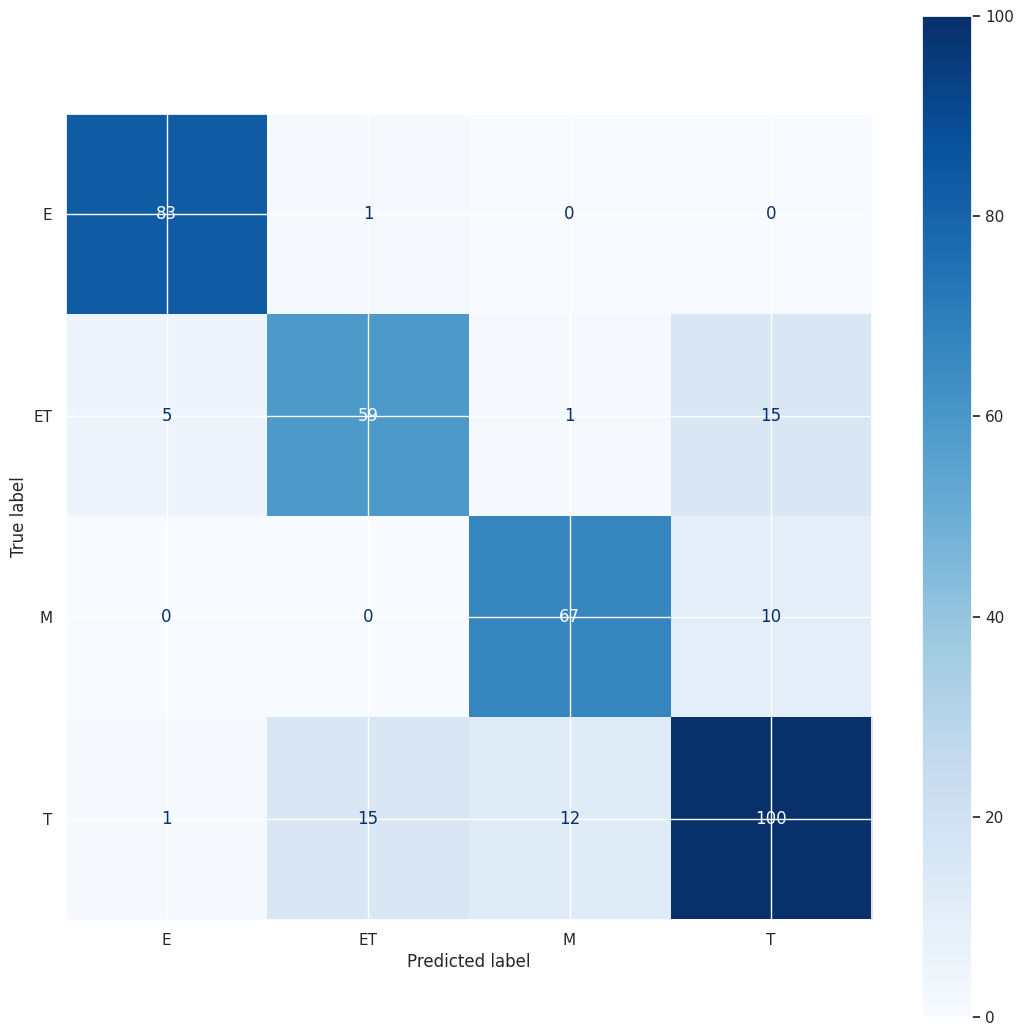

In [160]:
y_pred = model.predict(Xd_test)

print(metrics.classification_report(yd_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=Xd_test,
                              y=yd_test,
                              ax=ax,
                              cmap="Blues")

In [161]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
29,0.146193,ReleaseDate
7,0.133158,fantasy_violence
31,0.105968,num_descriptors
2,0.094029,blood
30,0.092065,strong_language
3,0.061942,blood_and_gore
28,0.054496,violence
32,0.036600,ReleaseYear
25,0.026078,suggestive_themes
9,0.023029,language


Not much improvement from the regualr decision tree

Maybe would be better with tuning

In [ ]:
# params = {
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [40, 38, 42],
#     "max_depth":  [ 58, 60, 62 , None],
#     #"min_samples_leaf" : [1, 10, 100],
#     "n_estimators" : [80, 100, 120 ],
#     "criterion" : ["gini", "entropy"]
# }

In [ ]:
# grid_search_cv = GridSearchCV( estimator=RandomForestClassifier(),
#     param_grid=params,
#     scoring="f1_weighted" )


In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)

# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
#                               X=X_test,
#                               y_true=y_test,
#                               ax=ax,
#                               cmap="Blues")

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Final model Selected is the default Random Forest Tree

In [162]:
final_model = RandomForestClassifier()

Training the data on the whole dataset and passing in the test set just to check the accuracy

This should be fine as even though the model has seen all the data games with the exact same descriptors can get different ratings

In [164]:
final_model.fit(Xd, yd)

RandomForestClassifier()

In [165]:
y_pred = final_model.predict(Xd_test)

In [166]:
print(classification_report(y_true=yd_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       1.00      1.00      1.00        84
          ET       1.00      1.00      1.00        80
           M       0.99      0.99      0.99        77
           T       0.99      0.99      0.99       128

    accuracy                           0.99       369
   macro avg       0.99      0.99      0.99       369
weighted avg       0.99      0.99      0.99       369



In [167]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 84   0   0   0]
 [  0  80   0   0]
 [  0   0  76   1]
 [  0   0   1 127]]


              precision    recall  f1-score   support

           E       1.00      1.00      1.00        84
          ET       1.00      1.00      1.00        80
           M       0.99      0.99      0.99        77
           T       0.99      0.99      0.99       128

    accuracy                           0.99       369
   macro avg       0.99      0.99      0.99       369
weighted avg       0.99      0.99      0.99       369



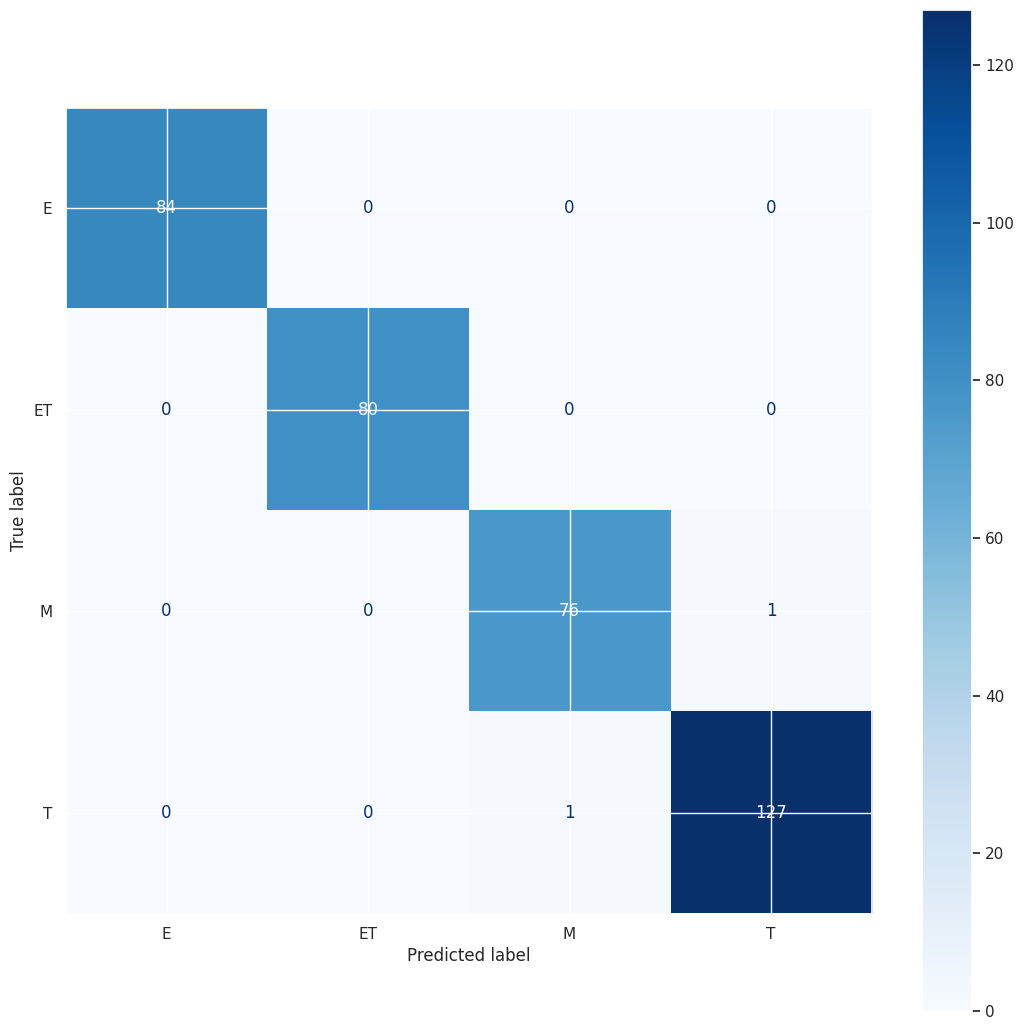

In [170]:
y_pred = final_model.predict(Xd_test)

print(metrics.classification_report(yd_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=final_model,
                              X=Xd_test,
                              y=yd_test,
                              ax=ax,
                              cmap="Blues")

In [171]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': final_model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
29,0.140549,ReleaseDate
7,0.129929,fantasy_violence
31,0.113225,num_descriptors
30,0.100271,strong_language
2,0.094212,blood
3,0.059929,blood_and_gore
28,0.053334,violence
32,0.034702,ReleaseYear
25,0.024564,suggestive_themes
9,0.024128,language


Training with all the data increased the accuracy to 91%

Maybe remove the console question

In [172]:
high_impact_descriptors = ["strong_language", "fantasy_violence", "blood_and_gore", "blood", "mild_fantasy_violence"]

In [173]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'ReleaseDate',
 'strong_language',
 'num_descriptors',
 'ReleaseYear']

In [175]:
count = 0

new_game_values = []

for descriptor in selected_features:



  if (descriptor == "num_descriptors"):
    print()

  else:


    print("Does your game have", descriptor, "?")
    answer = input("Enter y for yes and anything else for no:     ")

    print("**********************************************************************")

    if(answer == "y"):
      if descriptor == "ReleaseDate":
        date = input("Enter your release date yyyymmdd: ")
        new_game_values.append(date)
        count = count + 1
      else:
        new_game_values.append(1)
        count = count + 1

    else:
      new_game_values.append(0)





new_game_values.append(count)

# this works as it is the last feature

Does your game have alcohol_reference ?
Enter y for yes and anything else for no:     y
**********************************************************************
Does your game have animated_blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood ?
Enter y for yes and anything else for no:      
**********************************************************************
Does your game have blood_and_gore ?
Enter y for yes and anything else for no:      
**********************************************************************
Does your game have cartoon_violence ?
Enter y for yes and anything else for no:      
**********************************************************************
Does your game have crude_humor ?
Enter y for yes and anything else for no:      
**********************************************************************
Does your game have drug_reference ?
Enter y for yes and anything else 

In [176]:
new_game_values

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 '20040615',
 0,
 0,
 4]

Can look at the correlations to see what impact the high importance features have.

I am not sure how to handle multiple categories that seem to cover similar topics

For example

Blood

and

Blood and Gore

Should they both be answered or does one supercede the other




In [177]:
new_game_df = pd.DataFrame([new_game_values], columns=selected_features)

In [178]:
new_game_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,ReleaseDate,strong_language,num_descriptors,ReleaseYear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,20040615,0,0,4


In [179]:
y_pred = final_model.predict(new_game_df)

In [180]:
y_pred

array(['T'], dtype=object)

In [181]:
y_pred_proba = final_model.predict_proba(new_game_df)

In [182]:
y_pred_proba

array([[0.16, 0.02, 0.  , 0.82]])

In [183]:
df.esrb_rating.value_counts(normalize=True)

esrb_rating
T     0.366022
ET    0.219355
E     0.216774
M     0.197849
Name: proportion, dtype: float64

E, ET, M T

There seems to be a bias towars rating games T

Probably because of the unbalanced nature of the dataset

              precision    recall  f1-score   support

           E       1.00      1.00      1.00       415
          ET       0.99      1.00      0.99       427
           M       0.99      0.99      0.99       354
           T       1.00      0.99      0.99       647

    accuracy                           0.99      1843
   macro avg       0.99      1.00      0.99      1843
weighted avg       0.99      0.99      0.99      1843



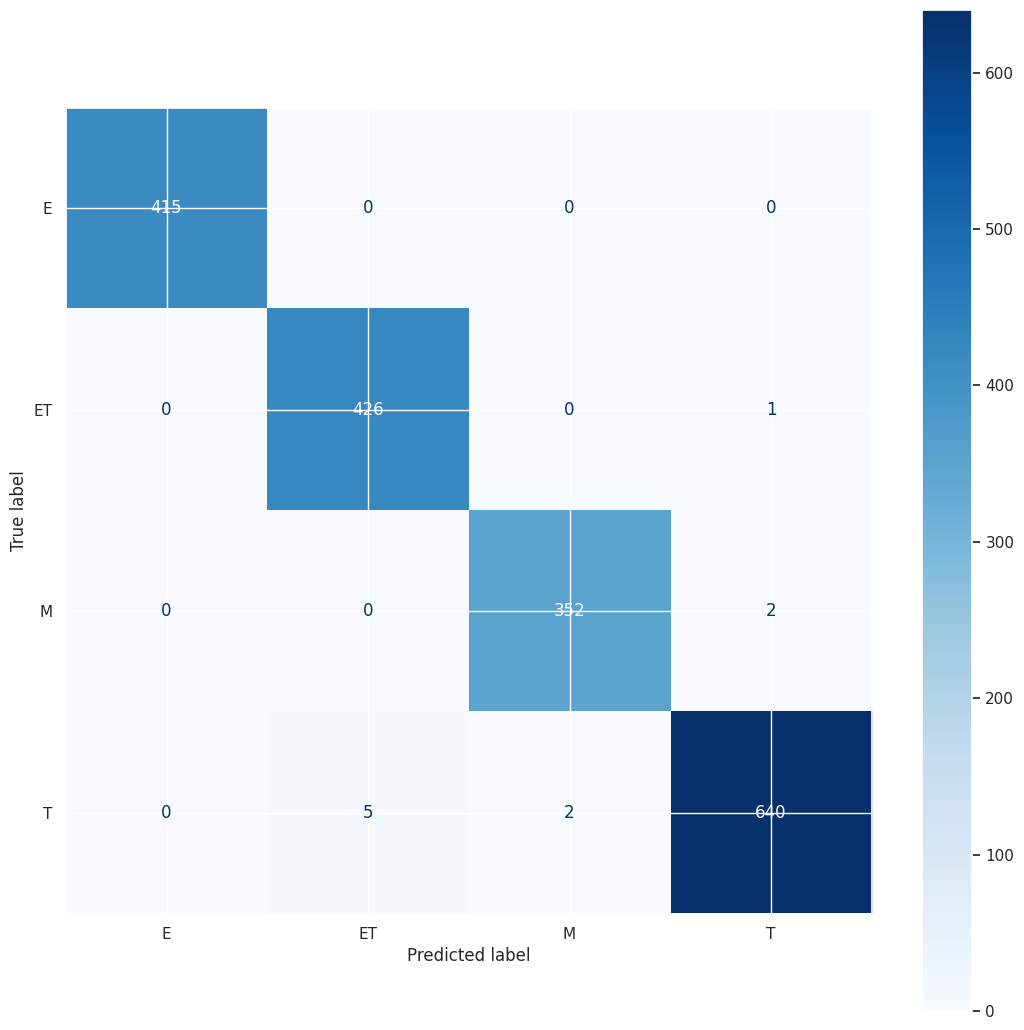

In [185]:
y_pred = final_model.predict(Xd)

print(metrics.classification_report(yd, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=final_model,
                              X=Xd,
                              y=yd,
                              ax=ax,
                              cmap="Blues")

In [186]:
from sklearn.naive_bayes import MultinomialNB

In [188]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(Xd_train, yd_train)


# Make new predictions of our testing data.
y_pred = model.predict(Xd_test)

In [189]:
print(classification_report(yd_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           E       0.96      0.98      0.97        84
          ET       0.73      0.78      0.75        80
           M       0.85      0.86      0.85        77
           T       0.79      0.75      0.77       128

    accuracy                           0.83       369
   macro avg       0.83      0.84      0.84       369
weighted avg       0.83      0.83      0.83       369



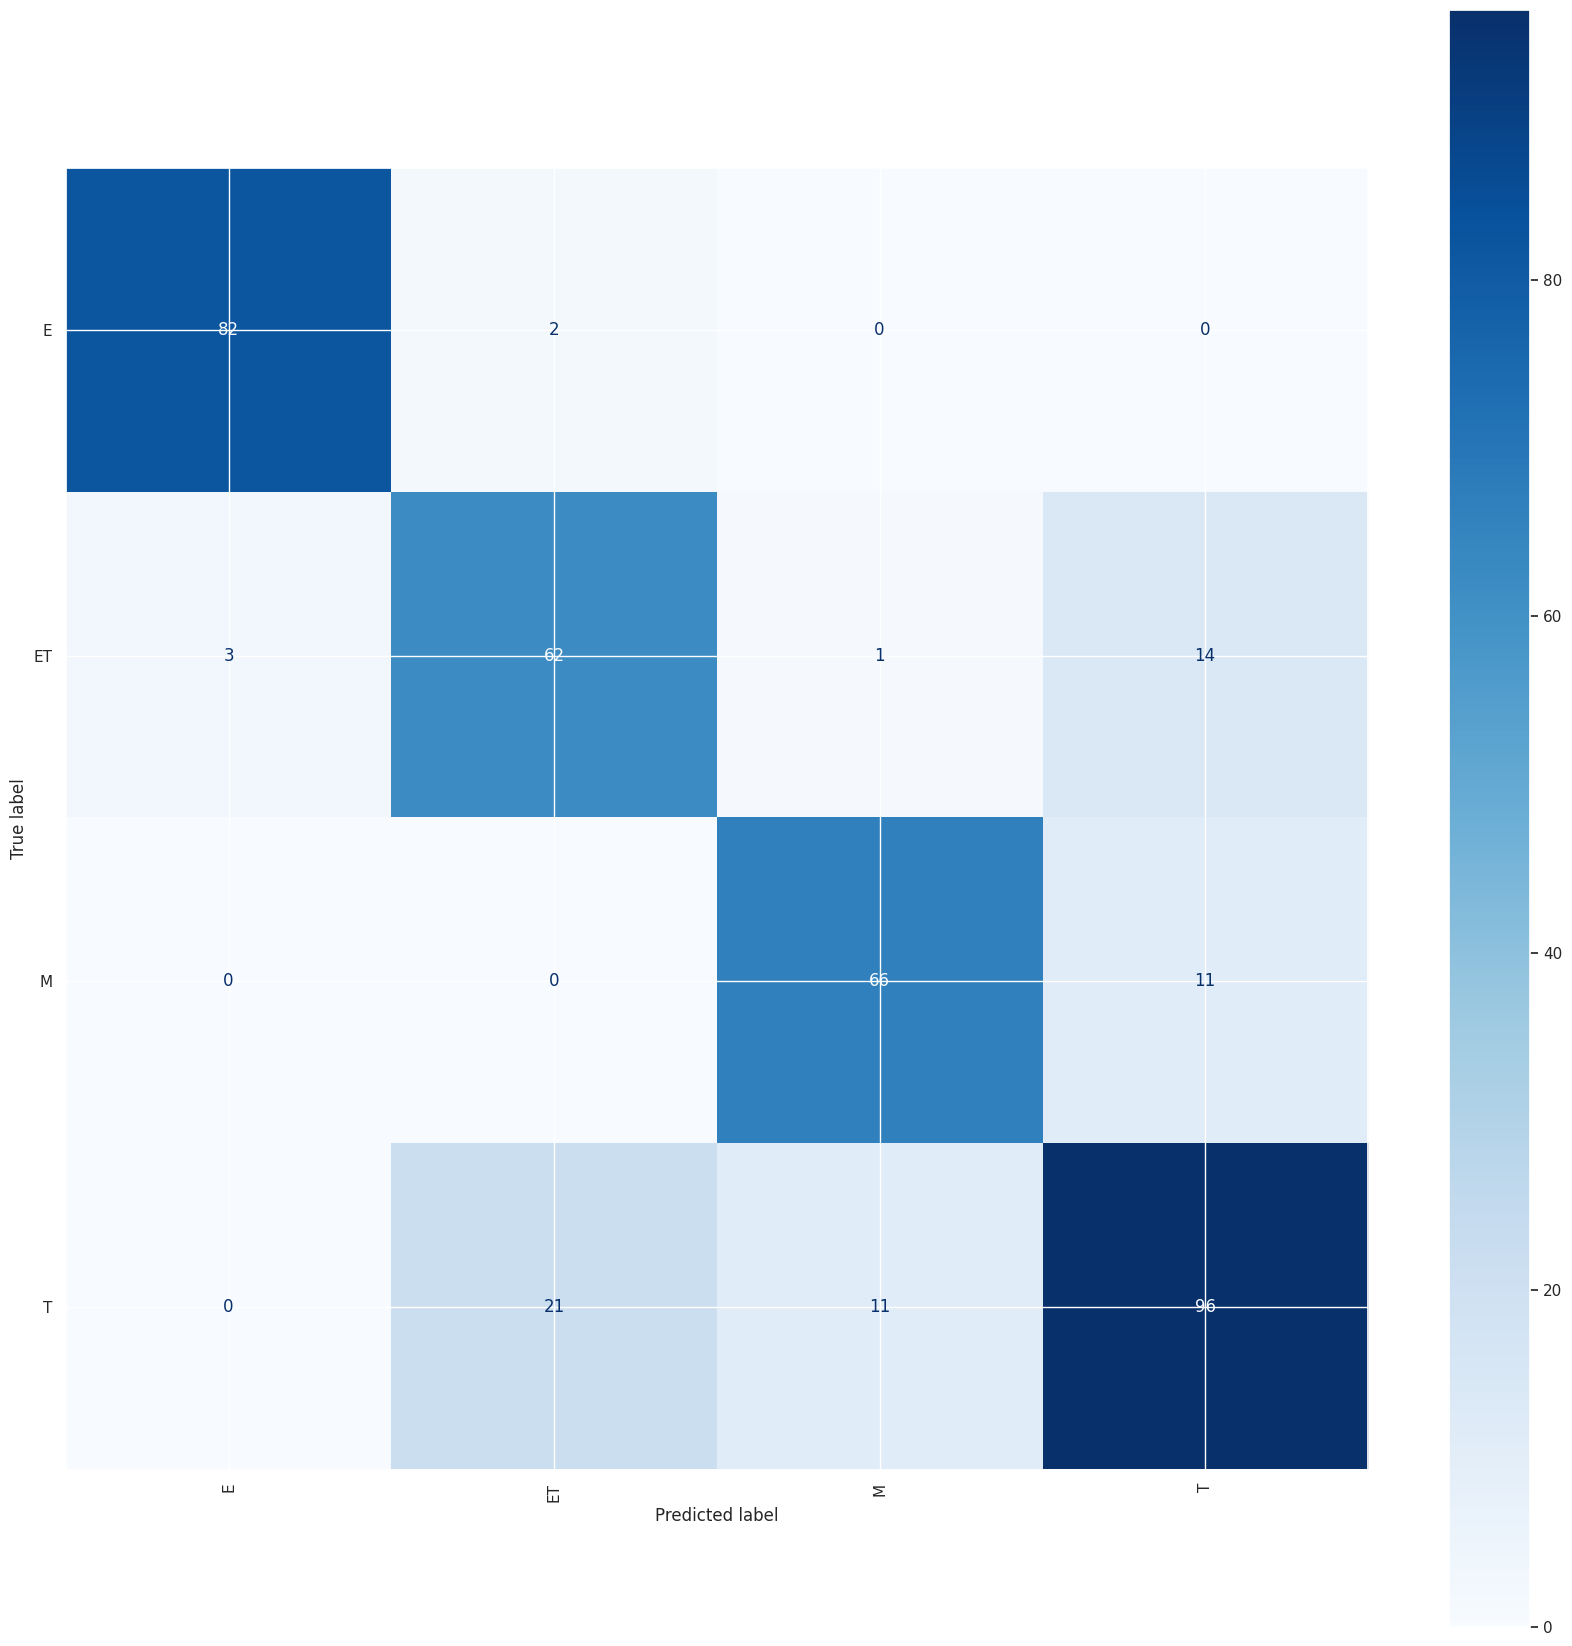

In [190]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = ConfusionMatrixDisplay.from_estimator(model, Xd_test, yd_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [191]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(Xd, yd)


# Make new predictions of our testing data.
y_pred = model.predict(Xd)

              precision    recall  f1-score   support

           E       0.97      0.98      0.97       415
          ET       0.77      0.87      0.81       427
           M       0.90      0.82      0.86       354
           T       0.82      0.78      0.80       647

    accuracy                           0.85      1843
   macro avg       0.86      0.86      0.86      1843
weighted avg       0.86      0.85      0.85      1843



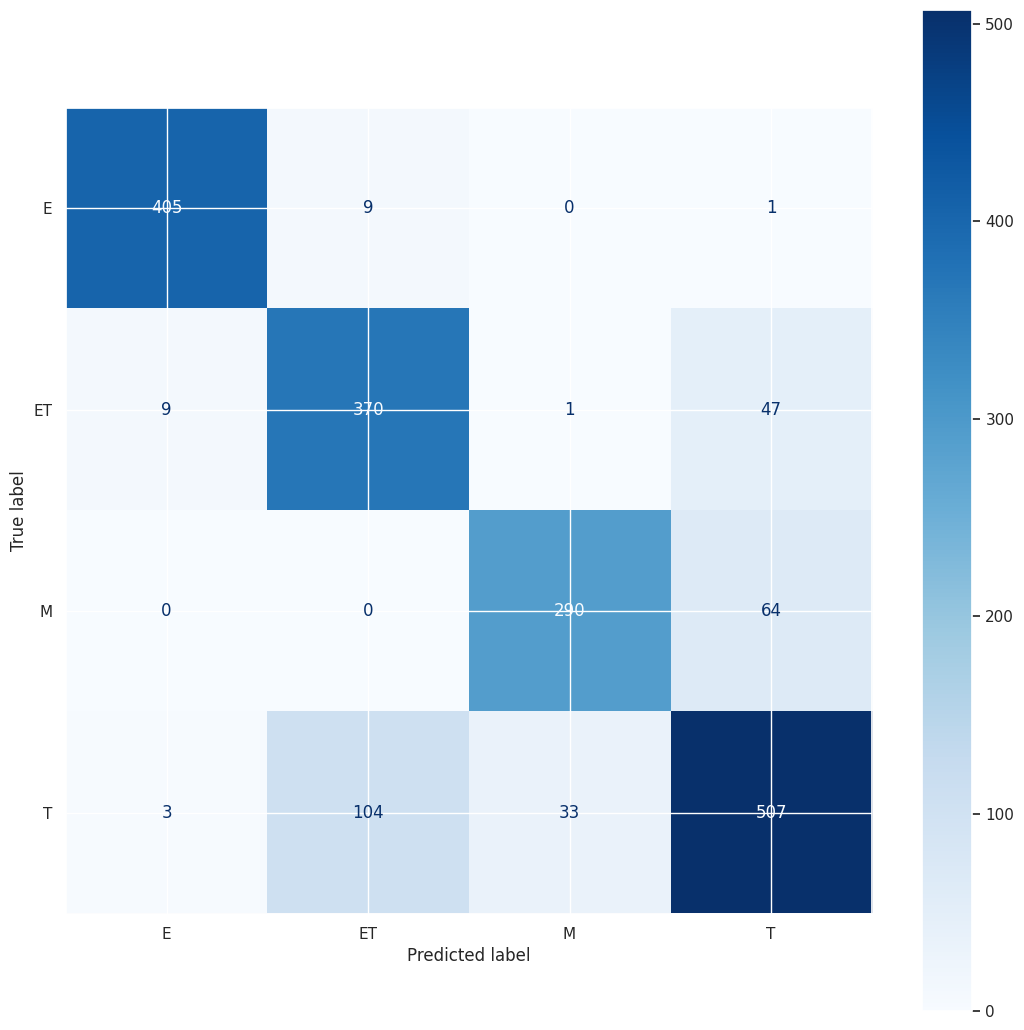

In [192]:
y_pred = model.predict(Xd)

print(metrics.classification_report(yd, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=Xd,
                              y=yd,
                              ax=ax,
                              cmap="Blues")

Random Forest is still the best

A K-means Clustering algorithm to try and see if there is a better way to do this

https://github.com/aadejare/new_esrb_rating/blob/main/new_esrb_rating.ipynb

Based on code from here which works on the same dataset

In [214]:
import xgboost as xgb
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}
yd_train, yd_test = yd_train.map(encode), yd_test.map(encode)

yd_train

232     0
2274    3
862     0
540     1
945     2
       ..
835     1
1984    2
2099    1
586     2
1279    2
Name: esrb_rating, Length: 1474, dtype: int64

In [215]:
vgxgb = xgb.XGBClassifier(random_state=531)
vgxgb2 = vgxgb.fit(Xd_train,yd_train)

In [216]:
y_pred = vgxgb2.predict(Xd_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.76      0.81      0.78        80
           2       0.80      0.78      0.79       128
           3       0.90      0.84      0.87        77

    accuracy                           0.85       369
   macro avg       0.85      0.85      0.85       369
weighted avg       0.85      0.85      0.85       369



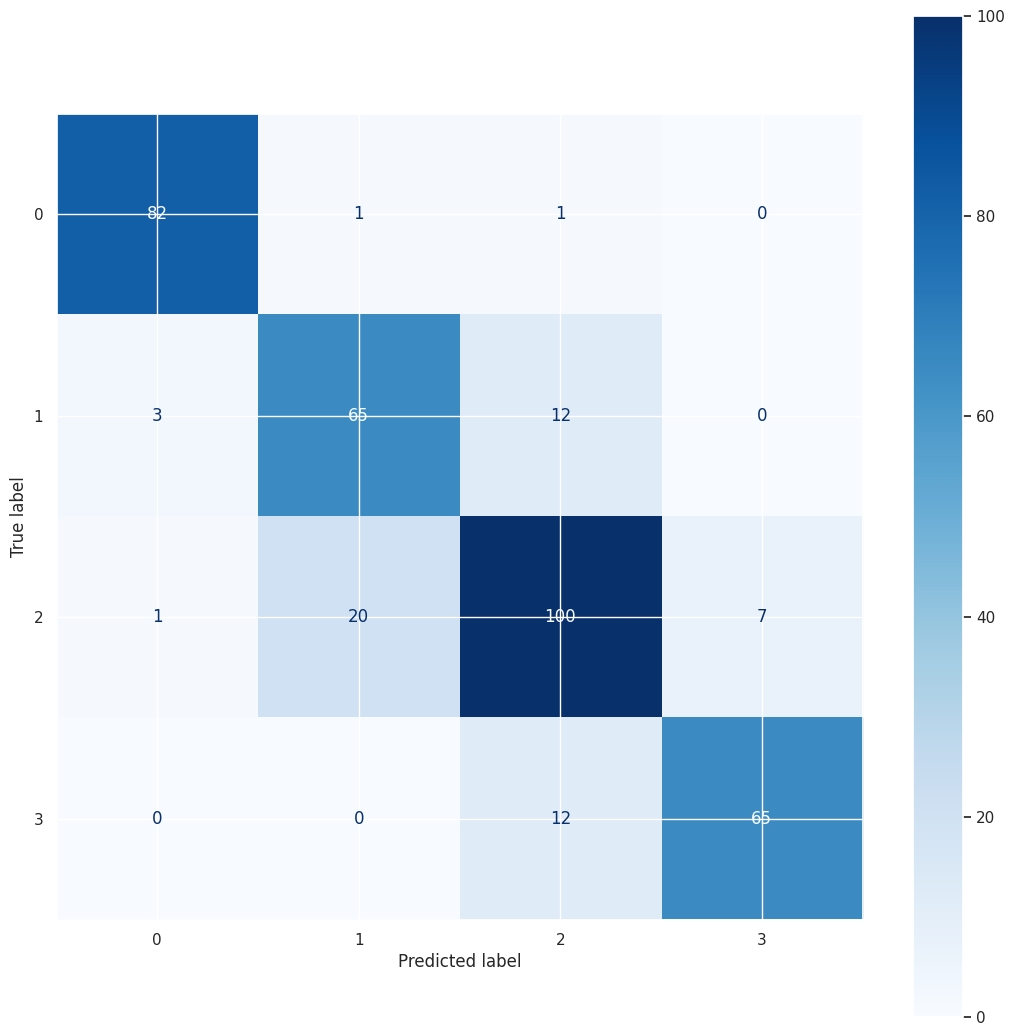

In [217]:

print(metrics.classification_report(yd_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=vgxgb2,
                              X=Xd_test,
                              y=yd_test,
                              ax=ax,
                              cmap="Blues")

Not better than Random forest

K Means Clustering

Based on same code

In [218]:
videogame2 = pd.get_dummies(df, columns=['esrb_rating']).copy()

In [219]:
videogame2.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,use_of_drugs_and_alcohol,violence,ReleaseDate,strong_language,num_descriptors,esrb_encoded,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,20210302,0,1,0,True,False,False,False
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,20210514,0,3,1,False,True,False,False
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,NaN,1,3,3,False,False,True,False
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,20150317,0,3,1,False,True,False,False
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,20210302,0,3,2,False,False,False,True


In [220]:
ratings=['esrb_rating_E','esrb_rating_ET','esrb_rating_M','esrb_rating_T']

In [221]:
X = videogame2[selected_features]

y = videogame2[ratings]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [223]:
from sklearn.cluster import KMeans

# maybe try hyper parameter tuning

# a bit difficlut to do since this is a blind algorithm

# 6 gives us very nice E and ET clusters

# 8 gives us a nice E and M cluster

# 10 gives us some decent E, ET an M clusters

# T is the hardest to cluster
# maybe because it is the most numerous
# also maybe because it is a bit of an edge category between ET and M
# maybe the dividing line is a bit more gray

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py)

In [224]:
model = KMeans(n_clusters = 11, n_init = 11, max_iter = 300)

NameError: name 'KMeans' is not defined

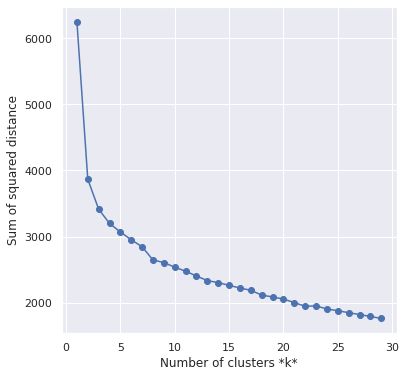

In [ ]:
sse = []
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The more categories the better the clusters
Maybe we would be better with new data

In [ ]:
params = {
    "n_clusters": [3, 4, 5, 6],
    "n_init": [5, 10, 15],
    "max_iter":  [ 200, 300, 400],

    "algorithm" : ["elkan", "auto", "full"]
}

In [ ]:
# grid_search_cv =  GridSearchCV( estimator=KMeans(),
#     param_grid=params,
#     scoring= "accuracy" )

# does not work because we do not have labaled data

In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
model.fit(X_train)

KMeans(n_clusters=11, n_init=11)

In [ ]:
rate_clust = y_train.copy()

In [ ]:
rate_clust = rate_clust.reset_index()
rate_clust['cluster'] = pd.Series(model.predict(X_train))

In [ ]:
rate_clust.head()

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,289,0,0,0,1,2
1,1883,0,0,1,0,0
2,1300,0,0,0,1,3
3,973,0,0,0,1,3
4,594,0,0,1,0,9


In [ ]:
rate_clust2 = pd.get_dummies(rate_clust, columns=['cluster']).copy()
rate_clust2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
esrb_rating_E,1.000000,-0.269830,-0.264798,-0.385800,-0.118864,0.351155,-0.146210,0.543386,-0.146210,-0.029580,-0.121425,-0.201826,-0.129475,-0.136581,-0.146635
esrb_rating_ET,-0.269830,1.000000,-0.273742,-0.398830,-0.117070,-0.061436,-0.146302,-0.182547,-0.029993,0.156282,-0.102733,0.594164,0.016882,-0.141194,-0.040904
esrb_rating_M,-0.264798,-0.273742,1.000000,-0.391392,0.425401,-0.105389,-0.016070,-0.231423,0.282740,-0.108995,0.205125,-0.200959,-0.082380,0.038011,0.052265
esrb_rating_T,-0.385800,-0.398830,-0.391392,1.000000,-0.160727,-0.153547,0.262459,-0.104425,-0.091266,-0.016685,0.016252,-0.169459,0.164566,0.204017,0.114257
cluster_0,-0.118864,-0.117070,0.425401,-0.160727,1.000000,-0.047307,-0.066583,-0.149876,-0.066583,-0.048926,-0.055296,-0.091910,-0.058962,-0.062198,-0.080284
cluster_1,0.351155,-0.061436,-0.105389,-0.153547,-0.047307,1.000000,-0.058191,-0.130986,-0.058191,-0.042760,-0.048327,-0.080326,-0.051531,-0.054359,-0.070166
cluster_2,-0.146210,-0.146302,-0.016070,0.262459,-0.066583,-0.058191,1.000000,-0.184357,-0.081901,-0.060183,-0.068018,-0.113055,-0.072527,-0.076508,-0.098755
cluster_3,0.543386,-0.182547,-0.231423,-0.104425,-0.149876,-0.130986,-0.184357,1.000000,-0.184357,-0.135469,-0.153106,-0.254483,-0.163255,-0.172216,-0.222293
cluster_4,-0.146210,-0.029993,0.282740,-0.091266,-0.066583,-0.058191,-0.081901,-0.184357,1.000000,-0.060183,-0.068018,-0.113055,-0.072527,-0.076508,-0.098755
cluster_5,-0.029580,0.156282,-0.108995,-0.016685,-0.048926,-0.042760,-0.060183,-0.135469,-0.060183,1.000000,-0.049981,-0.083075,-0.053294,-0.056219,-0.072567


We have a decent E cluster but the rest leave some to be desired

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([2, 2, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1,
       3, 1, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 1, 3,
       0, 1, 1, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 0, 3, 1, 3,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 1, 1, 1, 3, 1, 0, 1, 1, 0,
       1, 3, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 3, 1, 1, 3, 0, 0, 0, 3, 3, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 0, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 3, 1,
       1, 1, 1, 3, 2, 2, 3, 0, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 2, 0, 1, 2, 2, 1, 1, 3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 3, 1,
       3, 1, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 2,

In [ ]:
y_test

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
1924,0,1,0,0
627,0,0,0,1
1371,1,0,0,0
654,0,1,0,0
969,1,0,0,0
...,...,...,...,...
1957,0,1,0,0
2309,0,0,0,1
1374,0,0,0,1
691,0,1,0,0


In [ ]:
rate_clust_test = y_test.copy()
rate_clust_test = rate_clust_test.reset_index()
rate_clust_test['cluster'] = pd.Series(y_pred)

In [ ]:
rate_clust_test.head(20)

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,1924,0,1,0,0,2
1,627,0,0,0,1,2
2,1371,1,0,0,0,1
3,654,0,1,0,0,0
4,969,1,0,0,0,1
5,519,0,0,0,1,0
6,1994,0,0,0,1,2
7,1982,0,0,0,1,3
8,1271,0,1,0,0,2
9,1401,0,0,1,0,3


In [ ]:
rate_clust_test_2 = pd.get_dummies(rate_clust_test, columns=['cluster']).copy()
rate_clust_test_2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3
esrb_rating_E,1.000000,-0.297435,-0.245132,-0.439127,-0.235453,0.583286,-0.280268,-0.227595
esrb_rating_ET,-0.297435,1.000000,-0.232282,-0.416108,-0.094483,-0.029418,0.276018,-0.215664
esrb_rating_M,-0.245132,-0.232282,1.000000,-0.342937,0.315787,-0.322901,-0.013491,0.152469
esrb_rating_T,-0.439127,-0.416108,-0.342937,1.000000,0.048533,-0.242949,0.020901,0.268530
cluster_0,-0.235453,-0.094483,0.315787,0.048533,1.000000,-0.365978,-0.260099,-0.170722
cluster_1,0.583286,-0.029418,-0.322901,-0.242949,-0.365978,1.000000,-0.538966,-0.353764
cluster_2,-0.280268,0.276018,-0.013491,0.020901,-0.260099,-0.538966,1.000000,-0.251418
cluster_3,-0.227595,-0.215664,0.152469,0.268530,-0.170722,-0.353764,-0.251418,1.000000


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y_true=y_test,
                              ax=ax,
                              cmap="Blues")

NameError: name 'y_test' is not defined